BIENVENU SUR LE TUTORIEL 1 SUR L'ANALYSE CONVEXE AVEC color

EN DEBUTTANT SUR MATLAB POUR RESOUDRE DES PROBLEMES D'OPTIMISATON CONVEXE :

--il faut connaitre ce qu'es une fonction convexe

--Lorsqu'une fonction est dérivable et quel difference avec une fonction non dérivable

--quels sont les fonctions objectifs qui existe et comment faire le choix de la fonction objectif et aussi voir si on creer une fonction par rapport au problème qu'on rencontre

<div style="font-weight: bold; text-transform: uppercase; text-align: center; color: red; font-size: 25px;">
  commençons
</div>


par définition une fonction convexe c'est:

Une fonction f : R^n → R est dite convexe si :
f (θx + (1 − θ)y) ≤ θf (x) + (1 − θ)f (y),
∀x, y ∈ R^n , θ ∈ [0, 1].

<div>Maintenant, une fonction peut être :</div>
<ul>
  <li>Convexe</li>
  <li>Strictement convexe</li>
  <li>De Lipschitz</li>
</ul>


Lorsqu'on fait de l'optimisation, généralement on doit minimiser ou maximiser une fonction et souvent des contraintes accompagne ses fonctions

<div>UNLOCBOX qui est une boite a outils de Matlab developper pour faciliter la mise en œuvre de ces méthodes apportant modularité et intuitivité</div>

<ul><li>L’intérêt de cette bibliothèque réside dans sa capacité à décomposer un problème com-
plexe en une succession de sous-problèmes plus simples, chacun étant résolu par une
méthode adaptée</li></ul>

<div>
  Comme tout outil, essayons de comprendre son fonctionnement, commençons par :
  <ul>
    <li style="list-style-type: square;">
      l’architecture et la structure interne de UNLocBoX
      <ul>   <li style="list-style-type: square;">
      comprehension de la méthode de division proximal
    </li>
            <li style="list-style-type: square;">
      comprehension solveurs et de quelques solveurs qui existe sur cette outils Unlocbox
    </li>

</ul>
      <li style="list-style-type: square;">
      Avantages
    </li>
</ul>

</div>


<div style="font-family: Arial, sans-serif; line-height: 1.6; padding: 12px; border-radius: 6px;">

  <h3 style="color: #007BFF; text-transform: uppercase; text-align: center; font-size: 20px;">
    Architecture de UNLocBoX
  </h3>

  <p style="font-size: 16px;  text-align: justify;">
    L’architecture est composée de <strong>trois fonctions principales</strong> :
  </p>

  <ul style="list-style-type: square; margin-left: 25px;  font-size: 15px;">
    <li>
      <strong>Un solveur :</strong> il permet de résoudre les problèmes d’optimisation.  
      <br>
      <span style="">Les solveurs disponibles sont :</span>
      <span style="font-weight: bold;">
        Forward-Backward (FISTA), Douglas-Rachford, PPXA, SDMM
      </span>.
    </li>
    <li>
      <strong>Un opérateur de division proximal :</strong> il gère les fonctions non différentiables et applique les prox correspondants.
    </li>
    <li>
      <strong>Un fichier de démonstration :</strong> il contient des exemples pratiques pour montrer comment utiliser les différents solveurs.
    </li>
    <li>
      <strong>Une fonction utilitaire :</strong> elle regroupe les outils nécessaires au calcul du gradient, à l’affichage et à la configuration des paramètres.
    </li>
  </ul>

</div>


allons au solveurs:

voici une fonction:

![Capture d’écran du 2025-10-22 17-55-49.png](<attachment:Capture d’écran du 2025-10-22 17-55-49.png>)
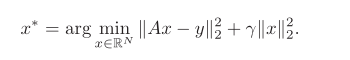

le champ f.eval est un handle de fonction MATLAB qui prend en entrée les variables d'optimisation x et
renvoie la valeur f(x).

In [ ]:
f.eval = @(x) eval_f(x)

f.grad
comme handle d'une fonction qui prend en entrée les variables d'optimisation x et renvoie
f(x).
Dans MATLAB,
NB : applicable si la fonction est differentiable

In [ ]:
f.grad = @(x) grad_f(x)

le champ bêta doit également être spécifié. Il contient une
borne supérieure de la constante de Lipschitz du gradient

In [ ]:
k∇f (x) − ∇f (y)k2 ≤ βkx − yk2

In [ ]:
f.beta =  @(x) f(x)

le champ gamma pour le pas d'itération

la tolerance est perçus comme un crictere d'arret de l'algortihme

In [ ]:
param.tol = 10e-5;

In [ ]:
param.gamma = 1;

le champ pour le maximum d'iteration max iterartion (maxit)

In [ ]:
param.maxit = 100;

le parametre et hyperparametre
on peut citer:
-verbose a 0 n'affiche aucune information
-verbose a 1 affiche les informations sur la convergence de la fonction de coût
-verbose a 2 affiche toutes les informations comme la convergence, le pas d'iteration, les valeurs des parametres


il est important que dans la notion de solveurs on parle aussi des parametre qui sont des éléments optionnels

par exemple pour la norme l1 ou la norme l2 encore appellé penalisation l1 et l2 on ecrit : 

In [ ]:
param_l1.At = @(x)

en effet le tutoriel nous apprend sur 3 paramètre d'optmisation: 
prenons d'abord une fonction de coût quadratique comme 

![Capture d’écran du 2025-10-22 18-00-38.png](<attachment:Capture d’écran du 2025-10-22 18-00-38.png>)
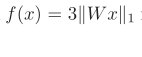

le paramètre A, X, Y

ces parametres sont : 

param_l1.A =@(x) W * x 
param_l1.At = @(x) W' *x
param_l1.tight = 0; param_l1.nu = norm(W)^2


ces paramètres de regularisation sont utile car permet de donner de bonne propriete au fonctions, souvent ajuster d'un parametre lambda qui est dans [0, 1]

le solveur dans unlocbox appelée solvep prend 3 parametre pour evaluer une fonction : 

In [ ]:
sol = solvep(x_0, {f1, f2, f3}, param);

Les operateurs Proximal

Si la fonction f n'est pas différentiable, elle doit être minimisée par son opérateur proximal.

donc on applique un opérateur proximal lorsque la focntion n'est pas differentiable.


In [ ]:
f1.prox = @(x, T) prox_f1(x, c*T)

l'idée est de trouver une x proche de la fonction ce qui veut dire encore proximite de f de t par c

In [ ]:
f.eval = @(x) 7 * norm(x, 1);
f.prox = @(x, T) prox_l1(x, 7*T);

on disque d'autre opérateur comme des normes l1, l2, l12, lTV (norme de variation total), l*(norme nucleaire)


prenons un exemple concret et appliquons avec Unlocbox sur Matlab

voyons une image d'un cameramen, et enlevons queque pixel et masqu'on avec un masque A et reconstituons l'image original

on initialise : avec 

In [ ]:
% Loading toolbox
init_unlocbox;

importons l'image avec imagesec

In [ ]:
imagesc_gray(im_original, 1, 'Original image');

introduisons un bruit qui evolue sous une forme de lois normal

In [ ]:
sigma_noise = 10/255;
im_noisy = im_original + sigma_noise * randn(size(im_original));


creons une matrice avec 50 zeros et un pas p

In [ ]:
% Create a matrix with randomly 50 % of zeros entry
p = 0.5;
matA = rand(size(im_original));
matA = (matA > (1-p));
% Define the operator
A = @(x) matA .* x;

appliquons le mask

In [ ]:
% Masked image
y = A(im_noisy);

fixons les parametres avant de passer la fonction objectif dans le solveurs

In [ ]:

lambda = 1;
% setting the function f1 (norm TV)
param_tv.verbose = verbose - 1;
param_tv.maxit = 100;

evaluation de la fonction et definition de l'operateur proximal

In [ ]:
f1.prox = @(x, T) prox_tv(x, lambda*T, param_tv);
f1.eval = @(x) lambda * norm_tv(x);

configuration de la division f2

In [ ]:
% setting the function f2
param_proj.epsilon = sqrt(sigma_noise^2 * numel(im_original) * p);
param_proj.A = A;
param_proj.At = A;
param_proj.y = y;

definition des contraintes avec des projections : les projections servent a evaluer les contraintes

In [ ]:
param_proj.verbose = verbose - 1;
f2.prox = @(x, T) proj_b2(x, T, param_proj);
f2.eval = @(x) eps;

definition des hyper-parametres

In [ ]:
% setting different parameters for the simulation
param_dg.verbose = verbose;
% display parameter
param_dg.maxit = 100;
% maximum number of iterations
param_dg.tol = 1e-5;
% tolerance to stop iterating
param_dg.gamma = 0.1 ;

choix de la methode : ici,douglas_rachford

In [ ]:
% solving the problem with Douglas Rachord
param_dg.method = 'douglas_rachford';
sol = solvep(y, {f1, f2}, param_dg);

la fonction converge et affiche les infos c'est à dire toutes les informations car on a fixer verbose a 2.

au bout de 15 iterations on a : Iter 063:     Prox_TV: obj = 7.017637e+01, rel_obj = 9.996872e-04, TOL_EPS, iter = 15